In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
# from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
# DATA_DIR = "Ice_Cub_Block_4.csv"
# dataset = pd.read_csv(DATA_DIR)
# dataset.drop(dataset.filter(like="L").columns, axis=1, inplace=True)
DATA_DIR = "Ice_Cub_Block.csv"
# DATA_DIR1 = "ice_cub_block_CM.csv"
# dataset1 = pd.read_csv(DATA_DIR)
# dataset2 = pd.read_csv("H3O_block.csv")
# print(dataset1.shape, dataset2.shape)
# dataset2 = dataset2[~dataset2.eq(10000).any(1)]
# dataset1 = dataset1[~dataset1.eq(10000).any(1)]
# print(dataset1.shape, dataset2.shape)

# dataset = pd.concat([dataset1, dataset2], ignore_index=True)
dataset = pd.read_csv(DATA_DIR)
# dataset1 = pd.read_csv(DATA_DIR1)
print(dataset.shape)

(20544, 21)


In [6]:
# Feature Engineering
# dataset["C-avg"] = (dataset["C0"] + dataset["C1"] + dataset["C2"] + dataset["C3"]) / 4
# dataset["B-avg"] = (dataset["B0"] + dataset["B1"] + dataset["B2"] + dataset["B3"]) / 4
# dataset["L-avg"] = dataset.filter(like="L").sum(axis=1) / len(dataset.filter(like="L").columns)
# dataset["CB_ratio"] = dataset["C-avg"] / dataset["B-avg"]
# for i in range(4):
#     dataset[f"CB_sum_{i}"] = dataset[f"C{i}"] + dataset[f"B{i}"]
# dataset["Hbond-Avg"] = (dataset["C2"] + dataset["C3"]) / 2
# dataset["Covbond-Avg"] = (dataset["C0"] + dataset["C1"]) / 2
# dataset["C-sphere"] = ((dataset[["C0", "C1", "C2", "C3"]].max(axis=1)) ** 3) * (4/3) * (3.1415)
# print(dataset.columns)
dataset

,C0,B0,L0_1,L0_2,L0_3,C1,B1,L1_1,L1_2,L1_3,...,B2,L2_1,L2_2,L2_3,C3,B3,L3_1,L3_2,L3_3,S-integral
0,0.979261,1.618141,0.983214,1.011566,1.739166,1.056929,1.940873,0.996113,1.002606,1.673609,...,1.024210,1.035154,1.712423,1.857599,1.994728,0.986468,0.963554,1.617049,1.927436,-20.251655
1,0.916680,1.685511,1.003966,1.005907,1.833427,1.011820,1.594906,1.040008,1.050460,2.030146,...,0.983214,1.011566,1.618141,1.739166,1.814020,1.028515,1.048402,1.731255,1.845230,-20.995382
2,0.939945,1.673609,0.996113,1.002606,1.940873,1.023201,1.774027,0.982671,1.001479,1.720130,...,0.986993,0.998493,1.742922,1.830239,1.842439,1.040008,1.050460,1.594906,2.030146,-21.253033
3,0.949274,1.580471,1.006289,1.007837,1.930799,1.034273,1.826111,0.969066,0.997273,1.889906,...,1.019325,1.014644,1.764946,1.775375,1.856382,0.996113,1.002606,1.673609,1.940873,-20.559805
4,0.969066,1.612425,0.929527,1.029291,1.877435,0.997273,1.893689,0.954752,1.023086,1.902538,...,1.034273,0.949274,1.611584,1.856382,1.889906,0.927566,1.028822,1.485667,1.603122,-20.833009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,0.992128,1.788552,0.984071,1.007439,1.870200,1.017163,1.707009,1.019434,1.053110,1.782090,...,0.968668,0.984715,1.719198,1.755522,1.896964,0.971194,1.004885,1.676530,1.681851,-20.579974
20540,1.019434,1.689866,0.938273,1.052223,1.786264,1.053110,1.685641,1.013320,1.016895,1.930521,...,1.017163,0.992128,1.770686,1.896964,1.782090,1.034827,0.983528,1.787396,2.026481,-20.507654
20541,1.010274,2.050928,0.972604,1.029597,1.468544,1.070442,1.670460,0.976442,1.051688,1.743443,...,1.027450,0.990752,1.625772,1.868849,1.734422,1.013320,1.016895,1.685641,1.930521,-20.872226
20542,0.958125,1.836311,1.008226,1.024254,2.017499,1.001036,1.625772,0.990752,1.027450,1.868849,...,1.006024,1.080994,1.719751,1.910661,1.953523,1.041880,1.005815,1.828779,1.892945,-20.672962


In [7]:
dataset_vals = dataset.values
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
dataset_vals_scaled = scaler.fit_transform(dataset_vals)
dataset_scaled = pd.DataFrame(dataset_vals_scaled, columns=dataset.columns)
# dataset_scaled = dataset

In [8]:
X = dataset_scaled.drop("S-integral", axis=1)
y = dataset_scaled["S-integral"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
print(X_train.shape, X_test.shape)

(16435, 20) (4109, 20)


In [11]:
NN = keras.Sequential()
NN.add(layers.Dense(20, input_dim=X_train.shape[1], activation='sigmoid', use_bias=True))
# NN.add(layers.BatchNormalization())
NN.add(layers.Dropout(0.2))
NN.add(layers.Dense(40, activation='sigmoid', use_bias=False))
# NN.add(layers.BatchNormalization())

# NN.add(layers.Dropout(0.2))
# NN.add(layers.Dense(20, activation='relu', use_bias=True))
# NN.add(layers.Dropout(0.2))
NN.add(layers.Dense(1, activation='linear'))

In [12]:
NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                800       
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1261 (4.93 KB)
Trainable params: 1261 (4.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
opt = keras.optimizers.SGD(learning_rate=0.01)
NN.compile(
    optimizer='adam',
    loss="mse",
    metrics=["mae"],
)

In [14]:
history = NN.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=125, verbose=0)

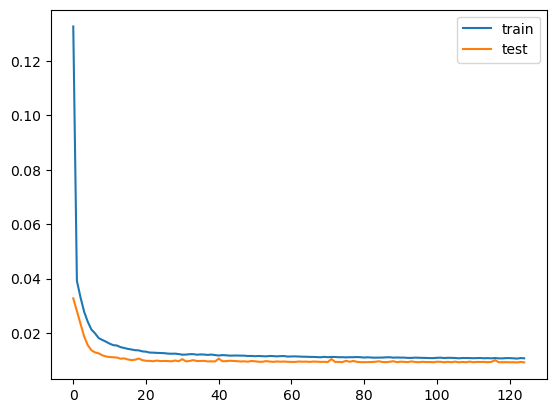

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'])

In [16]:
NN.evaluate(X_train, y_train)
NN.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.0092 - mae: 0.0763


[0.009158533066511154, 0.0763024091720581]

In [17]:
y_actual = dataset["S-integral"].loc[y_test.index]
y_hat = NN.predict(X_test)
y_hat = y_hat.reshape((len(y_hat),))
d = dataset_scaled.loc[y_test.index]
# print(dataset.head())
d["S-integral"] = y_hat
d_inv = pd.DataFrame(scaler.inverse_transform(d), columns=d.columns)
# d

129/129 [==============================] - 0s 1ms/step


In [18]:
y_pred = d_inv["S-integral"]
# print(y_pred)
se = (y_actual.values - y_pred.values) ** 2
mse = np.sum(se) / len(se)
rmse = np.sqrt(mse)
nrmse = rmse /  (max(y_actual) - min(y_actual))
rmspe = np.sqrt(np.mean(np.square(((y_actual - y_pred) / y_actual)), axis=0))
print("RMSE: ",rmse)
print("NRMSE: ",nrmse)
print("RMSPE: ",rmspe)

RMSE:  0.23695705301138878
NRMSE:  0.061480755219308764
RMSPE:  0.031192409756318543


In [19]:
print(y_actual)
print(y_pred)

385     -20.603888
8164    -20.185517
8845    -20.680430
13113   -20.678070
4032    -20.691776
           ...    
17696   -20.545984
3298    -20.907970
13785   -20.999430
13724   -21.367382
5621    -21.077595
Name: S-integral, Length: 4109, dtype: float64
0      -20.704091
1      -20.179879
2      -20.877221
3      -21.034407
4      -20.522721
          ...    
4104   -21.030396
4105   -20.704586
4106   -21.549379
4107   -21.466902
4108   -20.983555
Name: S-integral, Length: 4109, dtype: float64


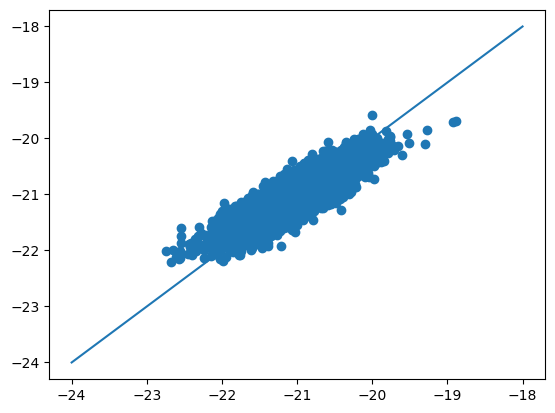

In [20]:
plt.scatter(y_actual, y_pred)
# plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)])
plt.plot([-24, -18],[-24, -18])

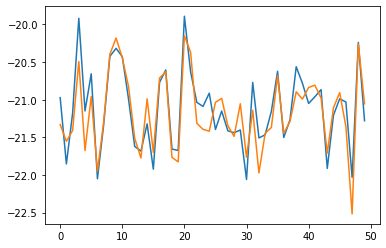

In [18]:
f = 200
d = 50
plt.plot( np.arange(d),y_actual[f:f+d])
plt.plot( np.arange(d),y_pred[f:f+d])